In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

%matplotlib inline

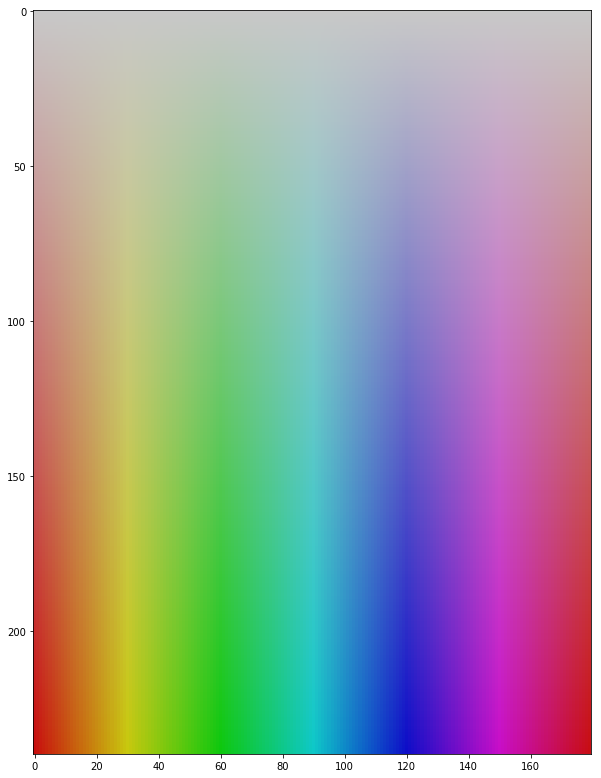

In [7]:
a = []
for i in range(180):
    for j in range(240):
        a.append([[i, j, 200]])
        
a = np.array(a, dtype=np.uint8)

b = np.vstack([a]*10)

a = np.array([
    [[i, j, 200]
     for j in range(240)]
    for i in range(180)
], dtype=np.uint8)

plt.figure(figsize=(10, 20))
plt.imshow(cv2.cvtColor(a.transpose([1, 0, 2]), cv2.COLOR_HSV2RGB))

In [3]:
get_hs = lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, [0, 1]]

In [4]:
bgr2rgb = lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [159]:
def plot_all(func):
    def wrapper(c, figsize=(25, 30), bins=190, count=float('inf')):
        listdir = os.listdir(c)
        ncols = 1
        nrows = min(count, len(listdir))
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True)
        plt.xlabel('encoded value')
        
        for i, fname in enumerate(listdir):
            if i >= count:
                break
                
            print(i, fname)
            fname = os.path.join(c, fname)
            img = cv2.imread(fname)

            z = func(img)

            axs[i].plot(range(len(z)), z)
            axs[i].set_xticks(range(0, len(z),len(z)//4))
            axs[i].set_title(fname)
            
    return wrapper

In [160]:
def moving_avg(z, k):
    r = np.zeros_like(z)
    for i in range(k):
        r[i] = z[:i+k].max()
    for i in range(k, len(z)-k):
        r[i] = z[i-k:i+k].max()
    return r

In [161]:
@plot_all
def plot_all_awesome(img):
    z = np.zeros(shape=[(33*32)+1])

    for i in range(img.shape[0]):
        r = range(img.shape[1])
        for j in r:
            t = 32*int(img[i][j][0]>>3)+int(img[i][j][1]>>3)
            z[t] += 1
    z[0] = 0
    z /= img.shape[0]*img.shape[1]
    return moving_avg(z, 24)

0 im25.jpg
1 im08.jpg
2 im21.jpg
3 im28.jpg
4 im06.jpg


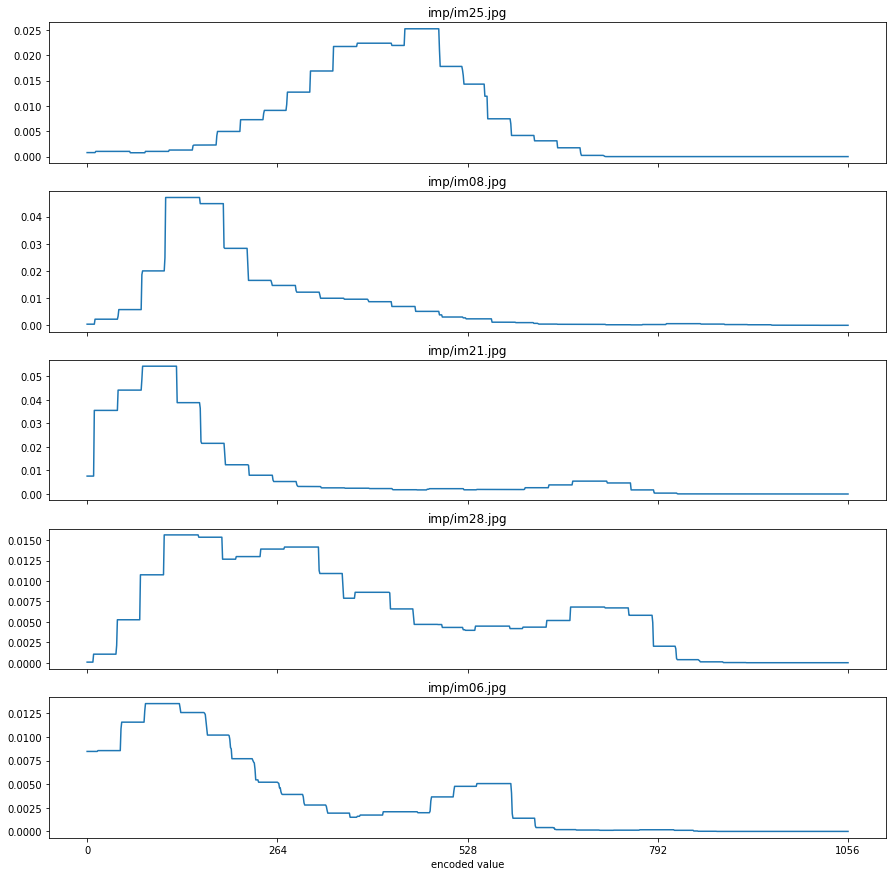

In [162]:
plot_all_awesome('imp', count=5, figsize=(15, 15))

0 ba18.jpg
1 ba15.jpg
2 ba13.jpg
3 ba02.jpg
4 ba03.jpg


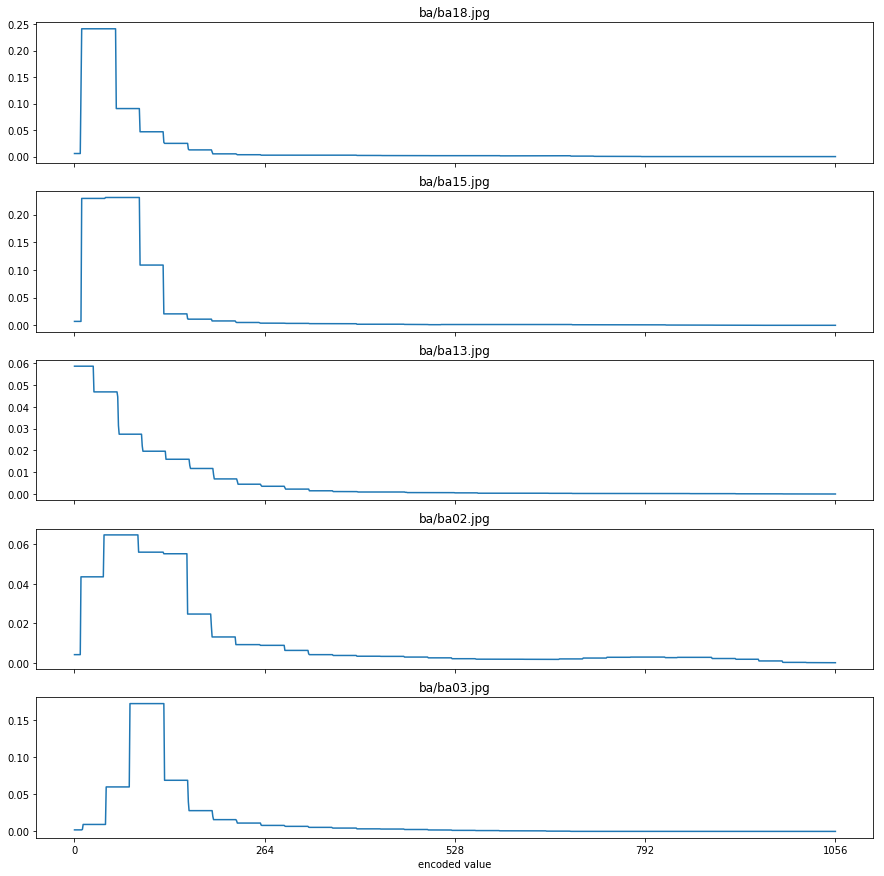

In [163]:
plot_all_awesome('ba', count=5, figsize=(15, 15))

0 26907962_1795128923865114_8495017529250411334_n.jpg
1 26907526_1795128853865121_2510336821621063046_n.jpg
2 27072570_1795128847198455_2528159201514405959_n.jpg
3 27164116_1795128850531788_86336591559340197_o.jpg


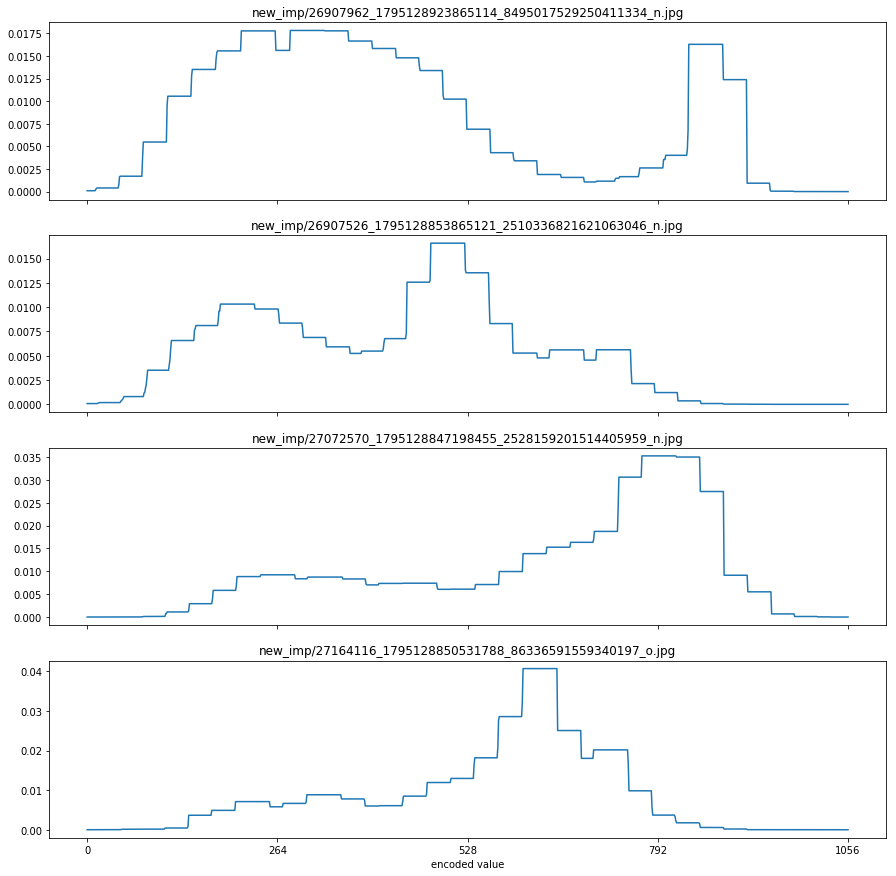

In [164]:
plot_all_awesome('new_imp', count=5, figsize=(15, 15))